# _Annie Samarpitha Chandolu_

* The feature and question I chose to work on is __dreams__ and __Do you usually remember your dreams?__.
* The Dataset for the features __dreams__ is: __dreams.csv__

## Reading the dataset

Finding out the features and splitting the dataset into training and testing sets, using a prediction feature to stratify.

In [1]:
import numpy as np
import pandas as pd
data_frame = pd.read_csv('dreams.csv')
print(data_frame.keys())
#print(data_frame.head(10))

data_frame['Do you usually remember your dreams? '].fillna('No', inplace=True)
data_frame['Do you feel sleepy a lot? '].fillna('No', inplace=True)
data_frame['Do you regularly stay awake much later than you meant to? '].fillna('No', inplace=True)

#data_frame = data_frame.rename(columns={'Do you usually remember your dreams? ': 'target'})
#print(data_frame.target)
#dream_df = pd.DataFrame(data_frame.data, columns = data_frame.feature_names)
#dream_df['Do you feel sleepy a lot? '] = dream_df.target


Index(['Unnamed: 0', 'Timestamp', 'Have you been in a plane?',
       'Have you ever been skydiving',
       'When you first saw the dress, what was the color?',
       'What's a popular food you don't like?',
       'When you look at a blue sky, do you see those swirly floaters in your vision? ',
       'Have you ever had a car run out of gas while you were driving it? ',
       'Name the first five animals you can think of',
       'What's the weather like where you are right now?',
       'Which of these can you do reasonably well?',
       'What word can you never seem to spell on the first try? ',
       'Do you eat condiments directly out of the fridge as a snack?',
       'When you adjust a thermostat that was set by someone else, it's usually because you want the room to be...',
       'What color is the shirt/dress/upper-body-clothing you're wearing right now, if any? ',
       'Do you get colds often? ', 'Pick a number from 1 to 100',
       'On a scale of 1 to 10, how good a

In [2]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer


data_frame['Do you usually remember your dreams? '] = np.where(data_frame['Do you usually remember your dreams? '] == 'No', 0, 1)
data_frame['Do you feel sleepy a lot? '] = np.where(data_frame['Do you feel sleepy a lot? '] == 'No', 0, 1)
data_frame['Do you regularly stay awake much later than you meant to? '] = np.where(data_frame['Do you regularly stay awake much later than you meant to? '] == 'No', 0, 1)
print(data_frame['Do you regularly stay awake much later than you meant to? '].describe())

count    467.000000
mean       0.809422
std        0.393178
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Do you regularly stay awake much later than you meant to? , dtype: float64


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

splitter = StratifiedShuffleSplit(n_splits = 1, test_size=0.20, random_state=123)

for train_in, test_in in splitter.split(data_frame, data_frame['Do you usually remember your dreams? ']):
    train_set= data_frame.iloc[train_in]
    test_set=data_frame.iloc[test_in]


#print(data_frame['Do you feel sleepy a lot? '].describe())
#data_frame['Do you feel sleepy a lot? '].dropna('')
#data_frame['Do you feel sleepy a lot? '] = data_frame.target
#data_frame

#for train_in, test_in in splitter.split(data_frame, data_frame.target):
#    train_set = data_frame.iloc[train_in]
#    test_set = data_frame.iloc[test_in]
    
#train_set, test_set = train_test_split(data_frame, test_size=0.2, stratify = ['Do you usually remember your dreams? '] )
#print(train_set.target.describe())
#print(test_set.target.describe())

#insufficient = [1,2,17,18,21,22,25,26,27,34,38,42,56]
#selected = data_frame['Do you feel sleepy a lot? ']
#keep = [d not in insufficient for d in data_frame['Do you feel sleepy a lot? ']]
#df = data_frame[keep]
#df.dropna(axis='columns')
#for train_in, test_in in splitter.split(df, df['Do you feel sleepy a lot? ']):    
#    train_set = df.iloc[train_in]   
#    test_set = df.iloc[test_in]

## Creating or modifying the data

### Example:

slickle_in = []

for s in data['Which of these words do you know the meaning of?']:

        if isinstance(s, str):
        
            slickle_in.append('Slickle' in s)
            
        else:
        
            slickle_in.append(False)
            
data['slickle_meaning'] = slickle_in

In [20]:
### Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

x=train_set[['Do you feel sleepy a lot? ','Do you regularly stay awake much later than you meant to? ']]
y=train_set[['Do you usually remember your dreams? ']]

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x,y)

y_pred = decision_tree.predict(x)
matrix = confusion_matrix(y, y_pred)

print('F1 score: ', f1_score(y,y_pred, average='micro'))
print('Accuracy: ', accuracy_score(y,y_pred))
print('Confusion Matrix: \n', matrix)

F1 score:  0.6300268096514745
Accuracy:  0.6300268096514745
Confusion Matrix: 
 [[235   0]
 [138   0]]


In [21]:
### Testing set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

X=test_set[['Do you feel sleepy a lot? ','Do you regularly stay awake much later than you meant to? ']]
Y=test_set[['Do you usually remember your dreams? ']]

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,Y)

y_pred = decision_tree.predict(X)
matrix = confusion_matrix(Y, y_pred)

print('F1 score: ', f1_score(Y,y_pred, average='micro'))
print('Accuracy: ', accuracy_score(Y,y_pred))
print('Confusion Matrix: \n', matrix)

F1 score:  0.6276595744680851
Accuracy:  0.6276595744680851
Confusion Matrix: 
 [[59  0]
 [35  0]]


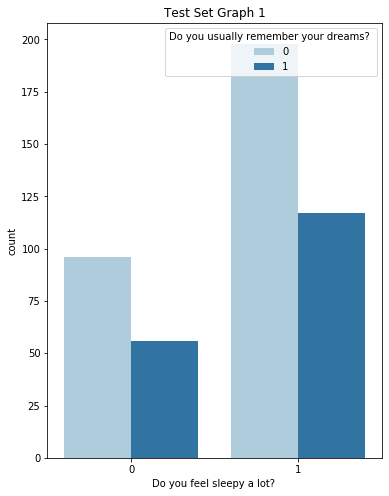

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,8))
sns.set_palette("Paired")
sns.countplot(x='Do you feel sleepy a lot? ', data = data_frame,hue = 'Do you usually remember your dreams? ') 
plt.title('Test Set Graph 1')
#plt.show()
plt.savefig('trainset.png')

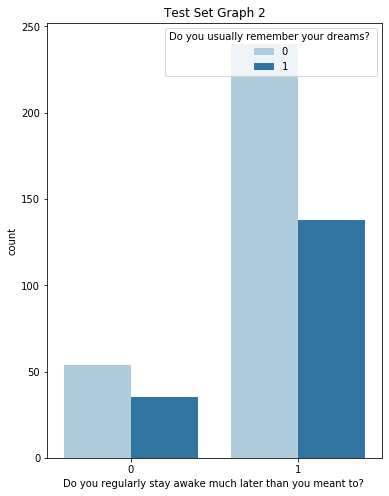

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,8))
sns.set_palette("Paired")
sns.countplot(x='Do you regularly stay awake much later than you meant to? ', data = data_frame,hue = 'Do you usually remember your dreams? ') 
plt.title('Test Set Graph 2')
#plt.show()
plt.savefig('testset.png')